In [45]:
import torch
import torchvision
from itertools import islice
import matplotlib.pyplot as plt
from models.wgan import GoodDiscriminator

In [5]:
torch.__version__

'1.0.1.post2'

In [6]:
discriminator = torch.load('discriminator.pt', map_location='cpu')


In [7]:
discriminator(torch.zeros(64,64,3))

tensor([15.4640], grad_fn=<ViewBackward>)

In [8]:
img_transforms = torchvision.transforms.Compose([
            #transforms.Resize(constants.INPUT_SIZE),
            #transforms.CenterCrop(constants.INPUT_SIZE),
            torchvision.transforms.ToTensor(),
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [9]:
img_dataset = torchvision.datasets.ImageFolder('./img_root', transform=img_transforms)

In [10]:
img_dataset

Dataset ImageFolder
    Number of datapoints: 7436
    Root Location: ./img_root
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [11]:
imgloader = torch.utils.data.DataLoader(img_dataset, batch_size=1)

In [12]:
zero_count = 0
one_count = 1
for x,y in imgloader:
    if y == 0: zero_count += 1
    elif y == 1: one_count += 1

In [13]:
zero_count, one_count
#CelebA, WGAN

(800, 6637)

In [17]:
#celeba_scores = []
#wgan_scores = []

for i, (x, y) in enumerate(imgloader):
    if i == 3000: break
    score = discriminator(x)
    if y == 0: 
        celeba_scores.append(score)
    elif y == 1: 
        wgan_scores.append(score)

In [18]:
len(wgan_scores)

2200

In [19]:
len(celeba_scores)

800

In [25]:
with open('celeba_scores.txt', 'w') as f:
    for x in celeba_scores:
        f.write(str(float(x))+'\n')

In [26]:
with open('wgan_scores.txt', 'w') as f:
    for x in wgan_scores:
        f.write(str(float(x))+'\n')

In [31]:
celeba_scalars = [float(x) for x in celeba_scores]
wgan_scalars = [float(x) for x in wgan_scores]

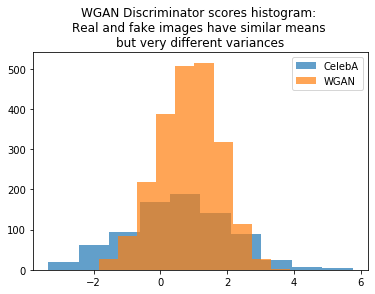

In [44]:
plt.hist(celeba_scalars, label="CelebA", alpha=0.7)
plt.hist(wgan_scalars, label="WGAN", alpha=0.7)
plt.title("WGAN Discriminator scores histogram: \nReal and fake images have similar means \nbut very different variances")
plt.legend()
plt.show()

In [87]:
tiny_img_dataset = torchvision.datasets.ImageFolder('./tiny_img_root', transform=img_transforms)

In [90]:
len(tiny_img_dataset)

20

In [93]:
rand_loader = torch.utils.data.DataLoader(tiny_img_dataset, batch_size=1, shuffle=True)

In [102]:
D = torch.load('discriminator.pt', map_location='cpu')


In [68]:
type(D)

models.wgan.GoodDiscriminator

In [103]:
optim = torch.optim.Adam(D.parameters(), lr=1e-4, betas=(0,0.9))

In [110]:
for epoch in range(20):
    print("Epoch ", epoch)
    celeba_cost = 0.
    wgan_cost = 0.
    for x,y in rand_loader:
        D.zero_grad()
        score = D(x)
        cost_signs = 1. - float(y)*2.
        cost = (cost_signs * score).mean()
        #total_cost += cost
        if y == 1: wgan_cost += cost
        elif y == 0: celeba_cost += cost
        n += len(x)
        cost.backward()
        optim.step()
        print(y, score)
    print(celeba_cost/10., wgan_cost/10.)

Epoch  0
tensor([1]) tensor([960.5341], grad_fn=<ViewBackward>)
tensor([1]) tensor([1185.5997], grad_fn=<ViewBackward>)
tensor([1]) tensor([1066.0100], grad_fn=<ViewBackward>)
tensor([0]) tensor([266.8915], grad_fn=<ViewBackward>)
tensor([1]) tensor([835.0325], grad_fn=<ViewBackward>)
tensor([1]) tensor([970.5942], grad_fn=<ViewBackward>)
tensor([0]) tensor([-679.5093], grad_fn=<ViewBackward>)
tensor([1]) tensor([1112.0443], grad_fn=<ViewBackward>)
tensor([0]) tensor([-203.6964], grad_fn=<ViewBackward>)
tensor([0]) tensor([-1073.9127], grad_fn=<ViewBackward>)
tensor([0]) tensor([-1027.9194], grad_fn=<ViewBackward>)
tensor([0]) tensor([-1025.8607], grad_fn=<ViewBackward>)
tensor([0]) tensor([-931.2356], grad_fn=<ViewBackward>)
tensor([1]) tensor([20.0077], grad_fn=<ViewBackward>)
tensor([1]) tensor([936.6129], grad_fn=<ViewBackward>)
tensor([1]) tensor([1421.2010], grad_fn=<ViewBackward>)
tensor([0]) tensor([-766.8210], grad_fn=<ViewBackward>)
tensor([0]) tensor([-883.9844], grad_fn=<Vi

tensor([0]) tensor([-3073.3743], grad_fn=<ViewBackward>)
tensor([1]) tensor([2013.2345], grad_fn=<ViewBackward>)
tensor([0]) tensor([-1884.7651], grad_fn=<ViewBackward>)
tensor([1]) tensor([2437.3552], grad_fn=<ViewBackward>)
tensor(-2443.3318, grad_fn=<DivBackward0>) tensor(-2478.2437, grad_fn=<DivBackward0>)
Epoch  7
tensor([0]) tensor([-3239.6365], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3228.0518], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3559.8054], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3250.2615], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3677.1885], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3409.0181], grad_fn=<ViewBackward>)
tensor([1]) tensor([-250.7308], grad_fn=<ViewBackward>)
tensor([1]) tensor([3156.7439], grad_fn=<ViewBackward>)
tensor([0]) tensor([-1884.4020], grad_fn=<ViewBackward>)
tensor([1]) tensor([2594.5225], grad_fn=<ViewBackward>)
tensor([0]) tensor([-3801.9292], grad_fn=<ViewBackward>)
tensor([1]) tensor([3939.5867], grad_fn=<ViewBackward>)

KeyboardInterrupt: 